In [15]:
import pyaudio as p
import wave as w
import numpy as np
from __future__ import print_function
import librosa
import librosa.display
import IPython.display
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

In [2]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="record_1.wav"

recording..1
finished recording
recording.. 2
finished recording
recording.. 3
finished recording
recording.. 4
finished recording
recording.. 5
finished recording
recording.. 6
finished recording
recording.. 7
finished recording
recording.. 8
finished recording
recording.. 9
finished recording
recording.. 10
finished recording
recording.. 11
finished recording
recording.. 12
finished recording
recording.. 13
finished recording
recording.. 14
finished recording
recording.. 15
finished recording
recording.. 16
finished recording
recording.. 17
finished recording
recording.. 18
finished recording
recording.. 19
finished recording
recording.. 20
finished recording


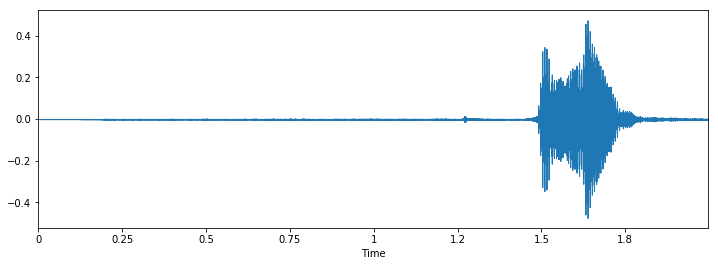

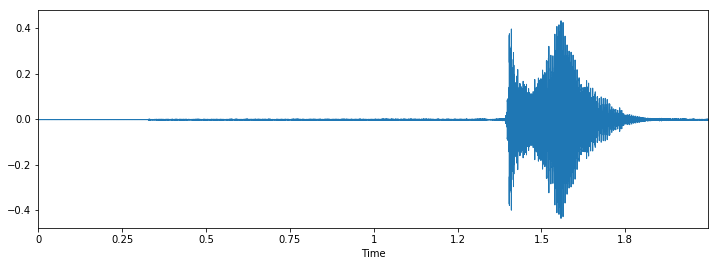

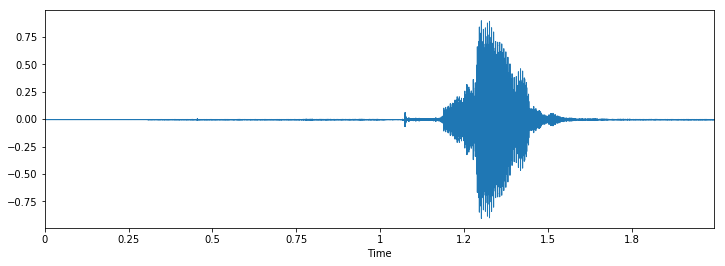

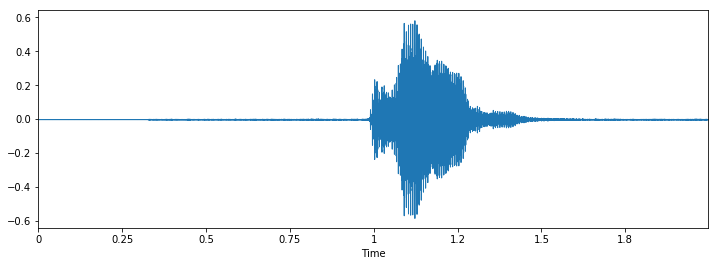

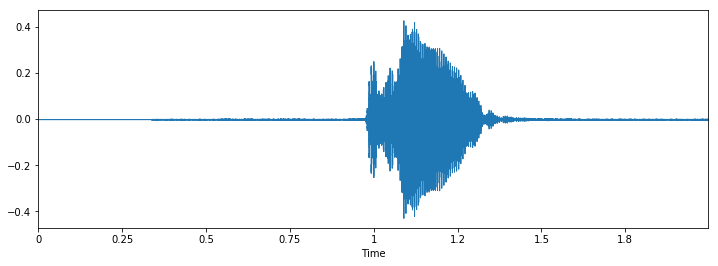

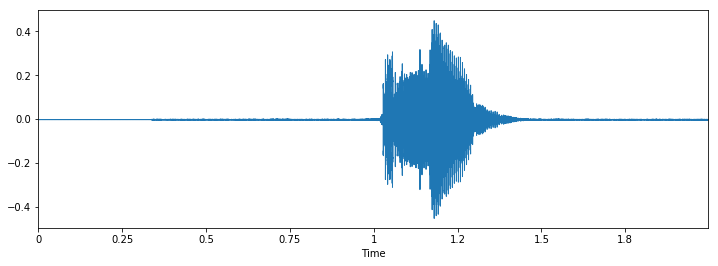

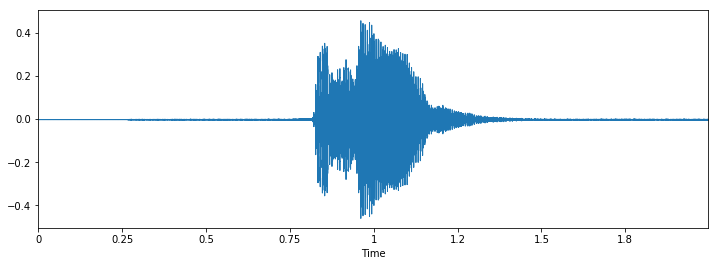

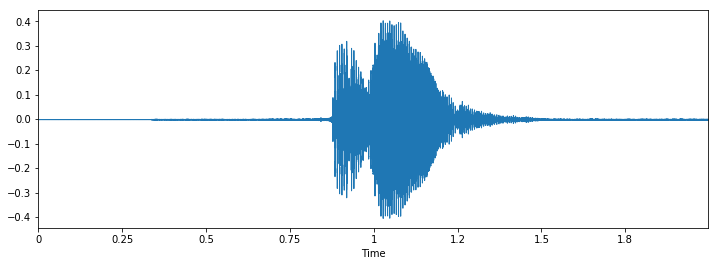

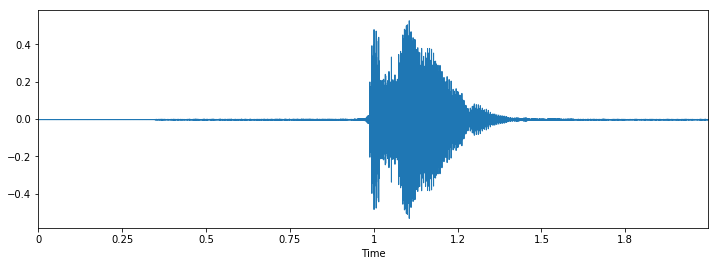

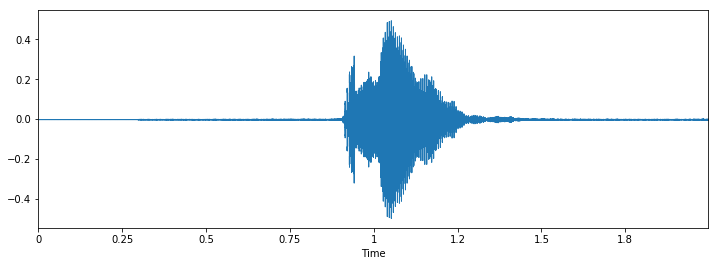

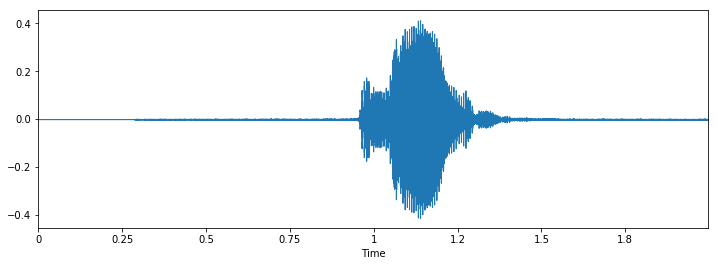

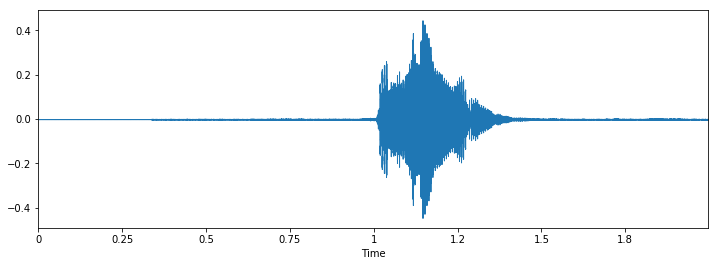

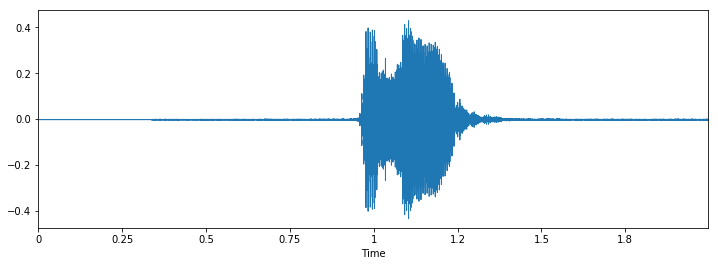

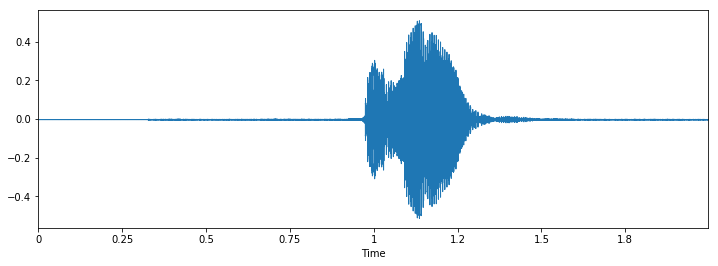

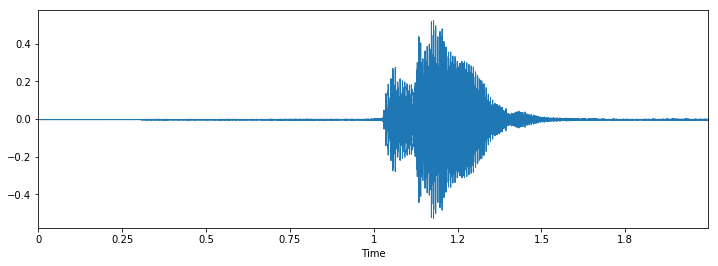

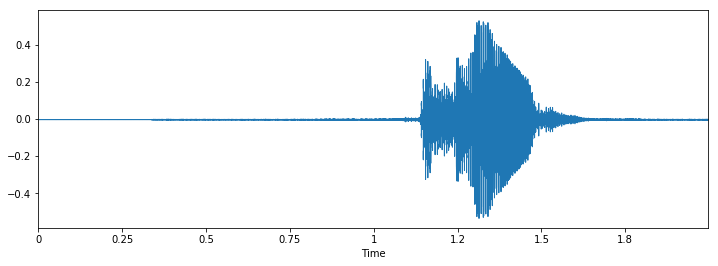

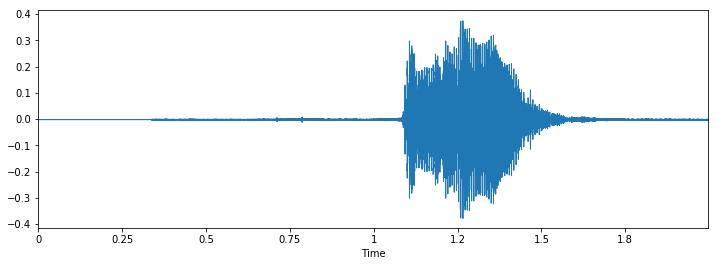

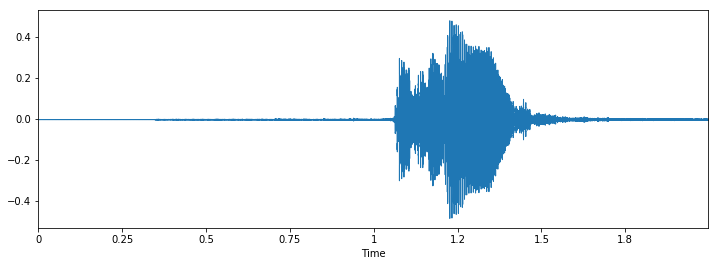

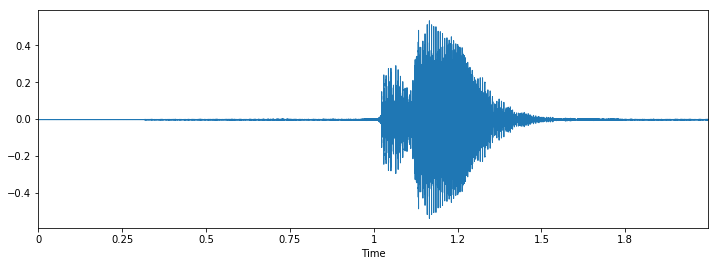

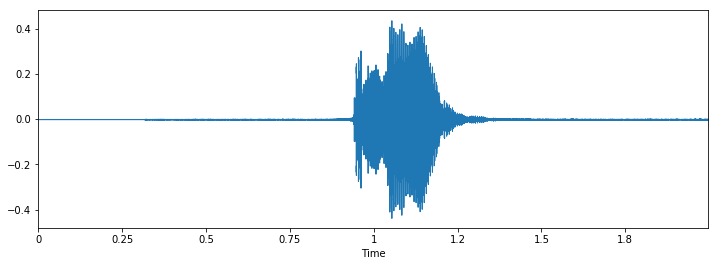

In [3]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
#for 1st input
print("recording..1")
frames=[]
for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

#save file
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


#load audio file
audio_path=WAVE_OUTPUT_FILENAME
X,sr=librosa.load(audio_path,res_type='kaiser_fast')

#audio signal
plt.figure(figsize=(12,4))
librosa.display.waveplot(X, sr=sr)

#generate mfcc
mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
df=mfcc

#sleep
time.sleep(1.2)

for i in range(19):
    audio=p.PyAudio()
    stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
    print("recording..",(i+2))
    frames=[]
    for j in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
        data=stream.read(CHUNK)
        frames.append(data)
    print("finished recording")

    #stop recording 
    stream.stop_stream()
    stream.close()
    audio.terminate()
    
    #save file
    waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()
    
    
    #load audio file
    audio_path=WAVE_OUTPUT_FILENAME
    X,sr=librosa.load(audio_path,res_type='kaiser_fast')
    #audio signal
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(X, sr=sr)
    
    #generate mfcc
    mfcc=librosa.feature.mfcc(y=X,sr=sr,n_mfcc=128)
    df=np.concatenate((df,mfcc),axis=0)
    time.sleep(1.2)
    

In [254]:
X_feature=df

In [255]:
X_feature

array([[-6.01407186e+02, -6.01407186e+02, -6.01407186e+02, ...,
        -5.23840878e+02, -5.23921939e+02, -5.24797278e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.19639640e+01,  6.00513197e+01,  5.89504274e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.81748251e+00,  5.84777099e+00,  8.12956144e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.17042619e-01,  1.52803569e+00,  1.15195346e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.43450590e-01,  8.06727751e-01, -1.61319480e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.08078374e-01, -6.64912263e-01, -2.63273482e+00]])

In [256]:
df.shape

(2560, 87)

In [169]:
#display in notebook
IPython.display.Audio(data=X,rate=sr)

In [257]:
X_feature.shape

(2560, 87)

In [258]:
#preprocessing
#X_feature=sklearn.preprocessing.scale(X_feature)
pca = sklearn.decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_feature.T)
X_feature=pca.transform(X_feature.T)

In [259]:
X_feature

array([[-1.04028155, -0.58667441],
       [-1.04028155, -0.58667441],
       [-1.04028155, -0.58667441],
       [-1.04028155, -0.58667441],
       [-1.04028155, -0.58667441],
       [-1.04033358, -0.58077286],
       [-1.04044478, -0.5713293 ],
       [-1.04046846, -0.56807462],
       [-1.0402029 , -0.54149998],
       [-1.04006615, -0.51738433],
       [-1.04008281, -0.51977017],
       [-1.03315391, -0.52302785],
       [-1.00828869, -0.54594781],
       [-0.94655892, -0.53174598],
       [-0.80139476, -0.4035512 ],
       [-0.62990943, -0.29166525],
       [-0.58592925, -0.26202192],
       [-0.57852531, -0.25826932],
       [-0.57384844, -0.2669558 ],
       [-0.56320786, -0.25993551],
       [-0.55776853, -0.25139832],
       [-0.5490514 , -0.26188531],
       [-0.53779294, -0.26373894],
       [-0.52233446, -0.27749918],
       [-0.51378227, -0.27547123],
       [-0.51916139, -0.23564101],
       [-0.52586218, -0.25207425],
       [-0.52533713, -0.2880751 ],
       [-0.50375282,

In [260]:
X_feature.shape

(87, 2)

In [261]:
label=[]
for i in range(0,87):
    label.append(1)
label= np.array(label)

In [262]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Add another person

In [263]:
df1=df

In [264]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="another.wav"

In [178]:
#start recording
audio=p.PyAudio()
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,output=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [179]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [265]:
audio_path= WAVE_OUTPUT_FILENAME
X_1,sr_1=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_1,rate=sr_1)

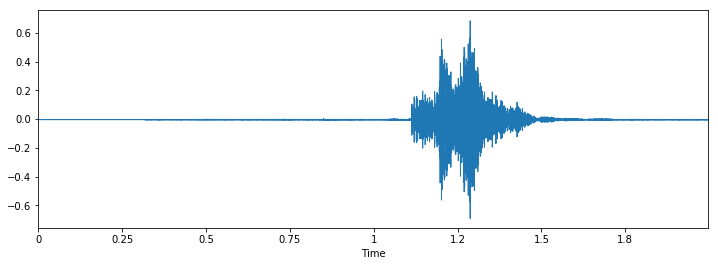

In [266]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_1, sr=sr_1)

In [267]:
X_another=librosa.feature.mfcc(y=X_1,sr=sr_1,n_mfcc=128)
X_another.shape

(128, 87)

In [268]:
#preprocessing
#X_another=sklearn.preprocessing.scale(X_another)
pca = sklearn.decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_another.T)
X_another=pca.transform(X_another.T)

In [269]:
X_another.shape

(87, 2)

In [288]:
X_another

array([[-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.88814189, -0.95157718],
       [-0.79910009, -0.52330157],
       [-0.55623021, -0.0548467 ],
       [-0.48807873,  0.01784189],
       [-0.48706785,  0.1070713 ],
       [-0.52926184, -0.01170381],
       [-0.50981884, -0.06294767],
       [-0.49686375, -0.02803049],
       [-0.49190332,  0.05388377],
       [-0.43856734,  0.21801469],
       [-0.44705834,  0.2885065 ],
       [-0.43092337,  0.31279613],
       [-0.45974635,  0.17955337],
       [-0.46921628,  0.08373731],
       [-0.47248293,  0.18003506],
       [-0.40588371,  0.18832362],
       [-0.38055476,

In [270]:
X_feature=np.concatenate((X_feature,X_another),axis=0)

In [271]:
X_feature.shape

(174, 2)

In [272]:
y_another=[]
for i in range(0,87):
    y_another.append(0)
y_another=np.array(y_another)

In [273]:
y_another

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [274]:
label=np.concatenate((label,y_another),axis=0)

In [275]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [276]:
label.shape

(174,)

In [277]:
from sklearn.svm import SVC
clf =SVC(kernel='rbf')
clf.fit(X_feature,label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Deep learning model

In [278]:
#seed = 7
#np.random.seed(seed)

In [139]:
def create_model():
    #build model
    model=Sequential()
    model.add(Dense(256,input_dim=2,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(2,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    model.summary()
    return model

In [140]:
model=create_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               768       
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total para

C:\Users\Nishant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_feature,label,test_size=0.2,random_state=21)

In [142]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(139, 2) (139,) (35, 2) (35,)


In [143]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=20)

Train on 139 samples, validate on 35 samples
Epoch 1/20
139/139 [==============================] - 1s 7ms/step - loss: 0.6978 - acc: 0.5108 - val_loss: 0.6986 - val_acc: 0.4286
Epoch 2/20
139/139 [==============================] - 0s 1ms/step - loss: 0.6935 - acc: 0.5540 - val_loss: 0.6992 - val_acc: 0.4571
Epoch 3/20
139/139 [==============================] - 0s 892us/step - loss: 0.6907 - acc: 0.5683 - val_loss: 0.6842 - val_acc: 0.5429
Epoch 4/20
139/139 [==============================] - 0s 978us/step - loss: 0.6845 - acc: 0.5683 - val_loss: 0.6891 - val_acc: 0.4571
Epoch 5/20
139/139 [==============================] - 0s 871us/step - loss: 0.6689 - acc: 0.5827 - val_loss: 0.6720 - val_acc: 0.5429
Epoch 6/20
139/139 [==============================] - 0s 928us/step - loss: 0.6750 - acc: 0.5971 - val_loss: 0.6505 - val_acc: 0.5429
Epoch 7/20
139/139 [==============================] - 0s 964us/step - loss: 0.6457 - acc: 0.6619 - val_loss: 0.6277 - val_acc: 0.7143
Epoch 8/20
139/139 [=

# Testing

In [279]:
FORMAT=p.paInt16
CHANNELS=2
RATE=44100 #sampling frequency rate
CHUNK=1024
RECORD_SECONDS=2
WAVE_OUTPUT_FILENAME="test.wav"
audio=p.PyAudio()

In [280]:
#start recording
stream=audio.open(format=FORMAT,channels=CHANNELS,rate=RATE,input=True,frames_per_buffer=CHUNK)
print("recording..")
frames=[]
for i in range(0,int(RATE/CHUNK * RECORD_SECONDS)):
    data=stream.read(CHUNK)
    frames.append(data)
print("finished recording")

#stop recording 
stream.stop_stream()
stream.close()
audio.terminate()

recording..
finished recording


In [281]:
waveFile = w.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

In [282]:
#load audio file
audio_path= WAVE_OUTPUT_FILENAME
X_2,sr_2=librosa.load(audio_path,res_type='kaiser_fast')
#display in notebook
IPython.display.Audio(data=X_2,rate=sr_2)

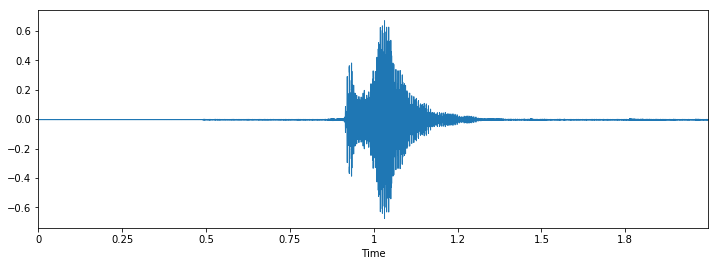

In [283]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(X_2, sr=sr_2)

In [284]:
X_user_test=librosa.feature.mfcc(y=X_2,sr=sr_2,n_mfcc=128)
X_user_test.shape

(128, 87)

In [285]:
X_user_test

array([[-5.72635406e+02, -5.72635406e+02, -5.72635406e+02, ...,
        -5.31240281e+02, -5.26861758e+02, -5.30894781e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.28475701e+01,  3.89903830e+01,  3.88878075e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.72456061e+00,  9.35771726e+00,  1.01353042e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.04480674e-01,  6.27599678e-01, -1.30617170e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.50205616e-01,  2.08349719e+00,  1.05830231e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.91978768e+00,  4.45428181e-01,  2.96872032e+00]])

In [286]:
#X_user_test=sklearn.preprocessing.scale(X_user_test)
pca = sklearn.decomposition.PCA(n_components=2, whiten=True)
pca.fit(X_user_test.T)
X_user_test=pca.transform(X_user_test.T)

In [287]:
X_user_test

array([[-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.75651209e-01, -7.15683586e-01],
       [-7.35648481e-01, -4.38731502e-01],
       [-5.71829249e-01,  4.15510847e-02],
       [-4.31870391e-01,  2.02182140e-01],
       [-4.

In [289]:
X_user_test.shape

(87, 2)

In [290]:
y_user_test=[]
for i in range(0,87):
    y_user_test.append(1)

In [291]:
y_pred=clf.predict(X_user_test)

In [292]:
from sklearn.metrics import accuracy_score
accuracy_score(y_user_test,y_pred)

0.3563218390804598

In [164]:
score=model.evaluate(X_user_test,y_user_test,verbose=0)

In [165]:
score

[0.4908621735956477, 0.7586206828040638]

# Using k fold

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=create_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_user_test, y_user_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))